In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.dates as mdates

In [2]:
def process_input(path):
    initial_datetime = datetime(2024, 6, 14)
    data = pd.read_parquet(path)
    data = data.select_dtypes(include=[np.number]).groupby("timestamp").aggregate("sum")["carbon_emission"]

    # Create a time range with hours only
    timestamps = [(initial_datetime + timedelta(seconds=30 * i)).time() for i in range(len(data))]

    # Set the DataFrame index to the time range
    data.index = timestamps

    # Return only the data within one day (if necessary)
    intervals_of_30_seconds_in_a_day = int(24 * 60 * 60 / 30)
    
    return data[:intervals_of_30_seconds_in_a_day] / 1000

# Setup Plot

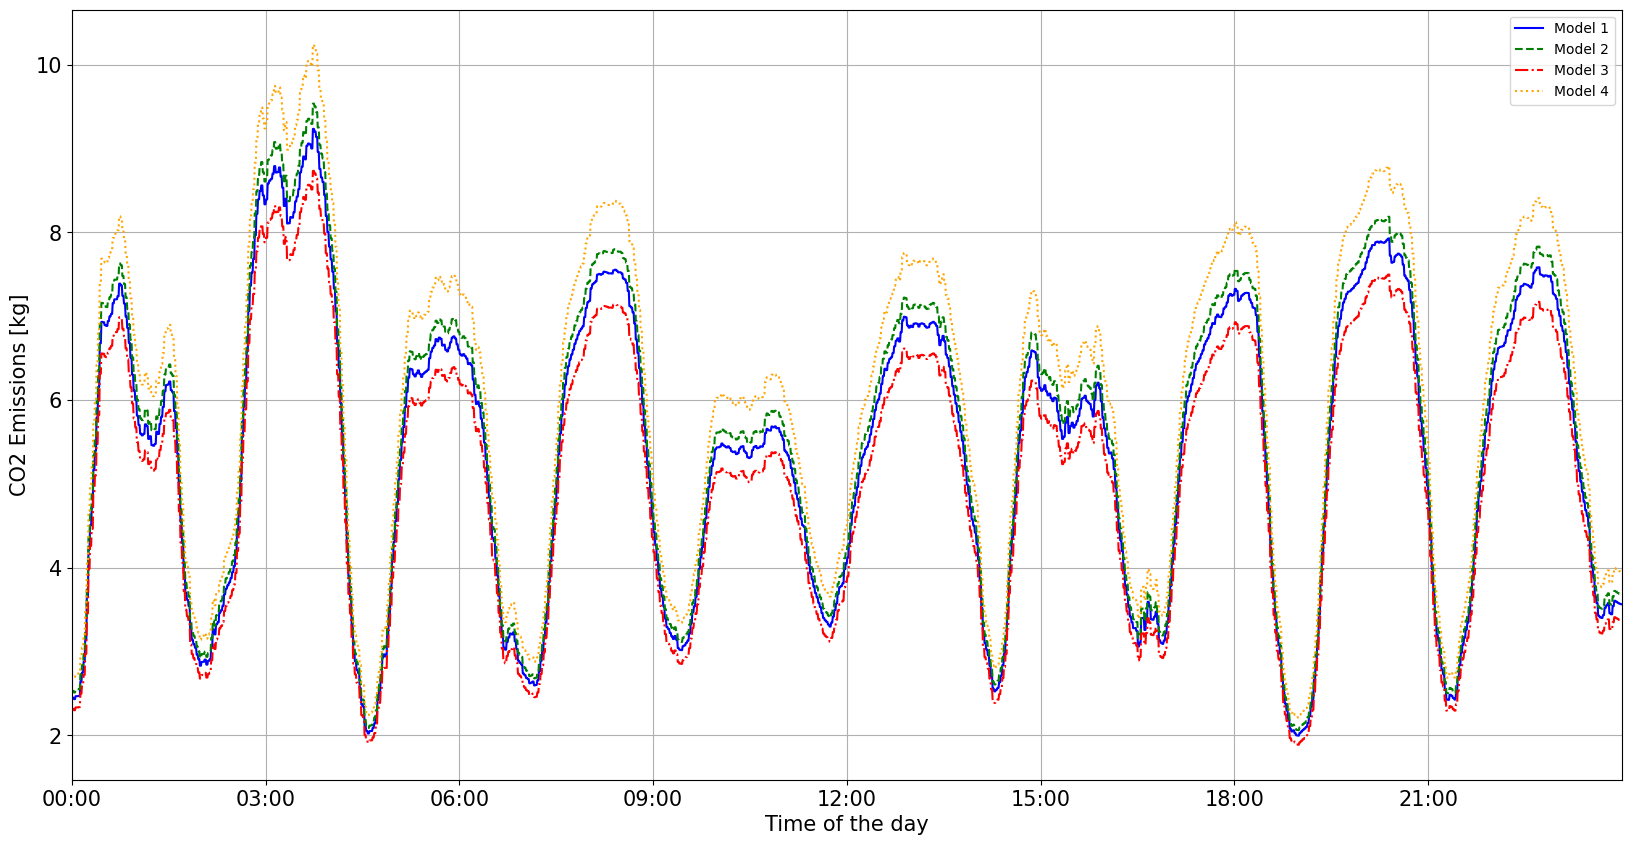

In [4]:
# Load data
host_1 = process_input("raw-output/0/seed=0/host.parquet")
host_2 = process_input("raw-output/1/seed=0/host.parquet")
host_3 = process_input("raw-output/2/seed=0/host.parquet")
host_4 = process_input("raw-output/3/seed=0/host.parquet")

# Convert the time index to a format suitable for plotting
host_1.index = pd.to_datetime(host_1.index.astype(str), format='%H:%M:%S')
host_2.index = pd.to_datetime(host_2.index.astype(str), format='%H:%M:%S')
host_3.index = pd.to_datetime(host_3.index.astype(str), format='%H:%M:%S')
host_4.index = pd.to_datetime(host_4.index.astype(str), format='%H:%M:%S')

# Setup the plot
plt.figure(figsize=(20, 10))
plt.xlabel("Time of the day", size=15)
plt.ylabel("CO2 Emissions [kg]", size=15)
plt.yticks(size=15)
plt.xticks(size=15)

# Plot data 
# plt.plot(host_1, label="Model 1", color="blue", linestyle='-', marker='o', markevery=100)
# plt.plot(host_2, label="Model 2", color="green", linestyle='--', marker='x', markevery=100)
# plt.plot(host_3, label="Model 3", color="red", linestyle='-.', marker='s', markevery=100)
# plt.plot(host_4, label="Model 4", color="orange", linestyle=':', marker='^', markevery=100)

# remove the markers
plt.plot(host_1, label="Model 1", color="blue", linestyle='-')
plt.plot(host_2, label="Model 2", color="green", linestyle='--')
plt.plot(host_3, label="Model 3", color="red", linestyle='-.')
plt.plot(host_4, label="Model 4", color="orange", linestyle=':')

# Format the x-axis to show times
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))

# Set x-axis limits
plt.xlim([datetime.strptime("00:00:00", "%H:%M:%S"), datetime.strptime("23:59:59", "%H:%M:%S")])

# Set y-ticks
# Grid and legend
plt.grid()
plt.legend()

# Show plot
plt.savefig("carbon_emission.pdf")
plt.show()